In [71]:
#install.packages(c('dplyr','ggplot2','car','ResourceSelection','broom','lmtest'))
library(dplyr)
library(ggplot2)
library(car)
library(ResourceSelection)
library(broom)
library(lmtest)

In [72]:
data <- read.csv("data3.csv", header = TRUE)
glimpse(data)

data$HoatDongTheChat <- factor(data$HoatDongTheChat, levels = c("It", "TrungBinh", "Nhieu"), ordered = TRUE)
data$SuDungThucPham <- factor(data$SuDungThucPham, levels = c("It", "TrungBinh", "Nhieu"), ordered = TRUE)

data$TienSuTramCamGiaDinh <- as.factor(data$TienSuTramCamGiaDinh)
data$TramCam <- as.factor(data$TramCam)

Rows: 350
Columns: 11
$ Tuoi                 <int> 22, 22, 20, 23, 22, 21, 20, 18, 23, 24, 19, 18, 2…
$ GioHoc               <dbl> 26.7, 15.9, 20.0, 6.9, 39.4, 16.1, 23.9, 33.2, 27…
$ GioNgu               <dbl> 8.5, 7.3, 9.3, 7.9, 4.2, 7.9, 7.8, 6.9, 7.1, 6.2,…
$ MoiQuanHeXaHoi       <int> 8, 5, 5, 4, 9, 2, 10, 9, 3, 10, 4, 2, 9, 2, 4, 6,…
$ TienSuTramCamGiaDinh <int> 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0…
$ ApLucHocTap          <int> 6, 10, 3, 5, 8, 6, 8, 10, 10, 7, 3, 1, 5, 5, 8, 1…
$ HoatDongTheChat      <chr> "It", "It", "TrungBinh", "Nhieu", "It", "TrungBin…
$ SuDungThucPham       <chr> "It", "Nhieu", "Nhieu", "TrungBinh", "It", "Nhieu…
$ ThuNhapGiaDinh       <dbl> 13.2, 2.0, 16.8, 11.4, 9.5, 10.0, 26.6, 12.7, 24.…
$ SuDungMangXaHoi      <dbl> 2.7, 3.9, 3.8, 3.6, 1.7, 5.2, 4.0, 3.4, 0.0, 5.7,…
$ TramCam              <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


In [73]:
# NGỌC - NV1 - NV2
# -------------------------------
# 1. Xây dựng mô hình hồi quy Logistic để dự đoán TramCam chỉ dựa vào biến ApLucHocTap.
# -------------------------------
cat("\nMô hình hồi quy Logistic để dự đoán TramCam dựa vào biến ApLucHocTap\n")
model_1 <- glm(TramCam ~ ApLucHocTap,
                 data = data,
                 family = binomial)
summary(model_1)

# Tính toán Tỷ số Chênh (Odds Ratio)
or_1 <- exp(coef(model_1))
cat('\nOR:',or_1)

# Lấy giá trị AIC
aic_1 <- AIC(model_1)
cat('\nAIC:',aic_1)


Mô hình hồi quy Logistic để dự đoán TramCam dựa vào biến ApLucHocTap



Call:
glm(formula = TramCam ~ ApLucHocTap, family = binomial, data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -5.3006     0.8805  -6.020 1.74e-09 ***
ApLucHocTap   0.3694     0.1104   3.348 0.000815 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 153.32  on 349  degrees of freedom
Residual deviance: 138.91  on 348  degrees of freedom
AIC: 142.91

Number of Fisher Scoring iterations: 6



OR: 0.004988648 1.446887
AIC: 142.9061

#Nhận xét

In [74]:
# NGỌC - NV1 - NV2
# -------------------------------
# 2. Xây dựng mô hình hồi quy Logistic để dự đoán TramCam dựa trên tất cả các biến độc lập đã cho
# -------------------------------
model_2 <- glm(
  TramCam ~ Tuoi + GioHoc + GioNgu + MoiQuanHeXaHoi +
    TienSuTramCamGiaDinh + ApLucHocTap + HoatDongTheChat +
    SuDungThucPham + ThuNhapGiaDinh + SuDungMangXaHoi,
  data = data,
  family = binomial
)

summary(model_2)

coef_table <- coef(summary(model_2))

# Lấy các biến có p-value < 0.05
sig_vars <- coef_table[coef_table[, "Pr(>|z|)"] < 0.05,]
printCoefmat(sig_vars, digits = 5, signif.stars = TRUE)

#So sánh AIC
cat("\nSo sánh AIC:\n")
cat("Model 1 AIC:", AIC(model_1), "\n")
cat("Model 2 AIC:", AIC(model_2), "\n")

#OR 2 biến TienSuTramCamGiaDinh và GioNgu
model_3 <- glm(TramCam ~ TienSuTramCamGiaDinh,
                 data = data,
                 family = binomial)

OR <- exp(coef(model_3))
CI <- exp(confint.default(model_3))
cbind(OR, CI)


model_4 <- glm(TramCam ~ GioNgu,
                 data = data,
                 family = binomial)

OR <- exp(coef(model_4))
CI <- exp(confint.default(model_4))
cbind(OR, CI)




Call:
glm(formula = TramCam ~ Tuoi + GioHoc + GioNgu + MoiQuanHeXaHoi + 
    TienSuTramCamGiaDinh + ApLucHocTap + HoatDongTheChat + SuDungThucPham + 
    ThuNhapGiaDinh + SuDungMangXaHoi, family = binomial, data = data)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -14.10818    5.13145  -2.749 0.005971 ** 
Tuoi                    0.39247    0.20171   1.946 0.051694 .  
GioHoc                 -0.17515    0.06079  -2.881 0.003959 ** 
GioNgu                 -0.85785    0.34525  -2.485 0.012966 *  
MoiQuanHeXaHoi         -0.59881    0.17910  -3.344 0.000827 ***
TienSuTramCamGiaDinh1   2.91138    1.10751   2.629 0.008570 ** 
ApLucHocTap             0.99040    0.28839   3.434 0.000594 ***
HoatDongTheChat.L      -1.22453    1.09349  -1.120 0.262782    
HoatDongTheChat.Q      -1.68547    0.86725  -1.943 0.051961 .  
SuDungThucPham.L       -0.87611    0.84361  -1.039 0.299025    
SuDungThucPham.Q       -0.24706    0.77449  -0.319 0.749723 

                        Estimate Std. Error z value  Pr(>|z|)    
(Intercept)           -14.108176   5.131452 -2.7494 0.0059713 ** 
GioHoc                 -0.175149   0.060785 -2.8814 0.0039587 ** 
GioNgu                 -0.857849   0.345253 -2.4847 0.0129663 *  
MoiQuanHeXaHoi         -0.598812   0.179095 -3.3435 0.0008272 ***
TienSuTramCamGiaDinh1   2.911375   1.107507  2.6288 0.0085695 ** 
ApLucHocTap             0.990395   0.288386  3.4343 0.0005942 ***
SuDungMangXaHoi         1.679256   0.390168  4.3039 1.678e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

So sánh AIC:
Model 1 AIC: 142.9061 
Model 2 AIC: 72.8154 


,OR,2.5 %,97.5 %
(Intercept),0.04511278,0.02530096,0.08043819
TienSuTramCamGiaDinh1,2.77083318,1.08753519,7.05955690


,OR,2.5 %,97.5 %
(Intercept),0.4966370,0.06034887,4.087042
GioNgu,0.7313515,0.53128451,1.006758


#Nhận xét

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


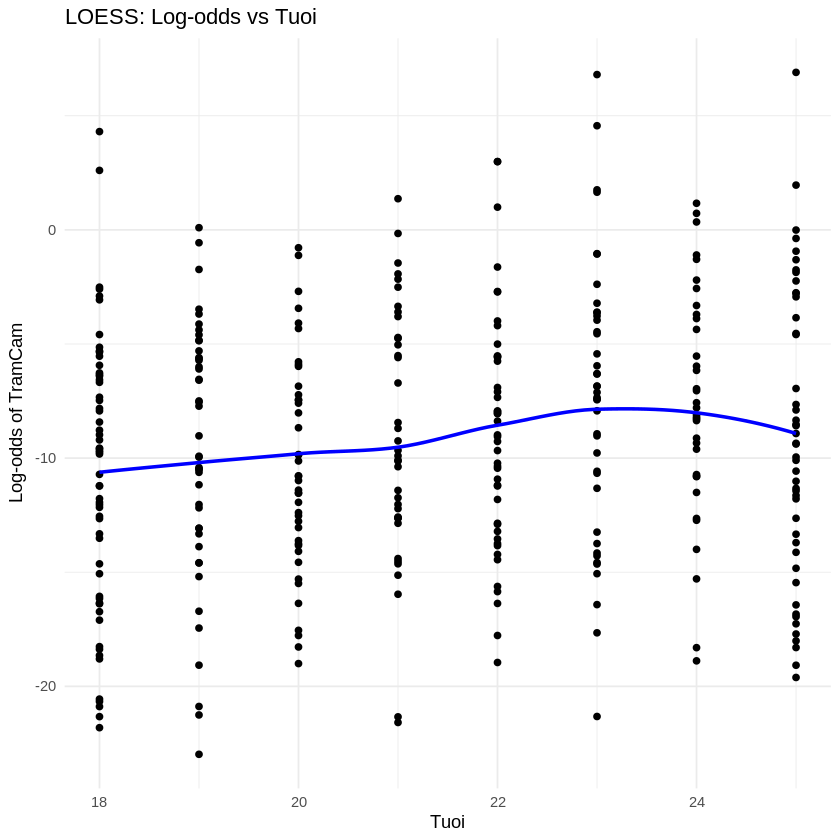

`geom_smooth()` using formula = 'y ~ x'


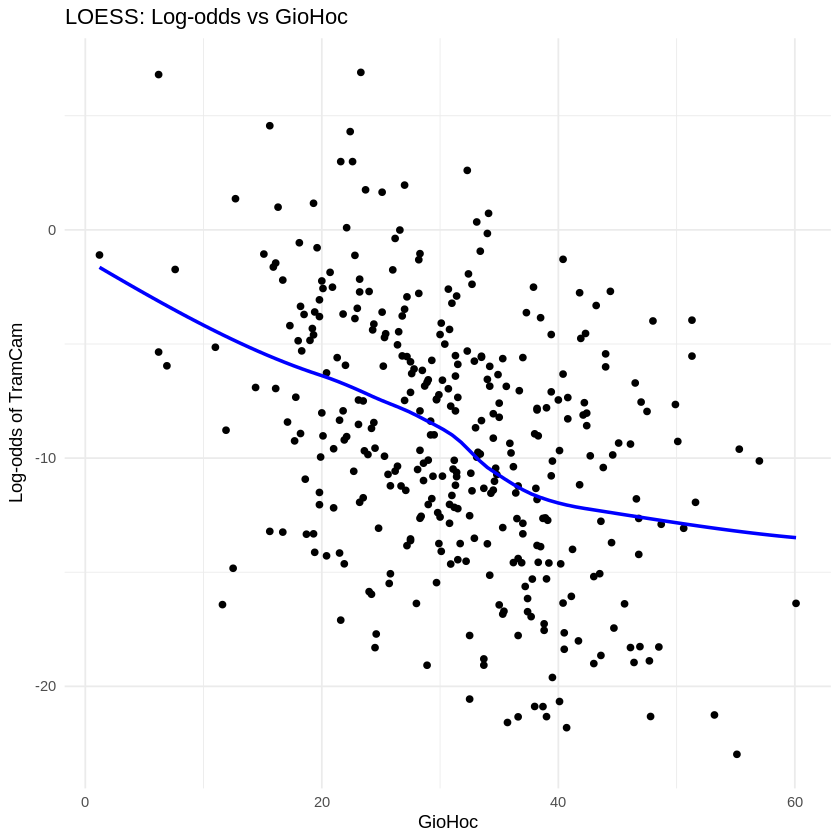

`geom_smooth()` using formula = 'y ~ x'


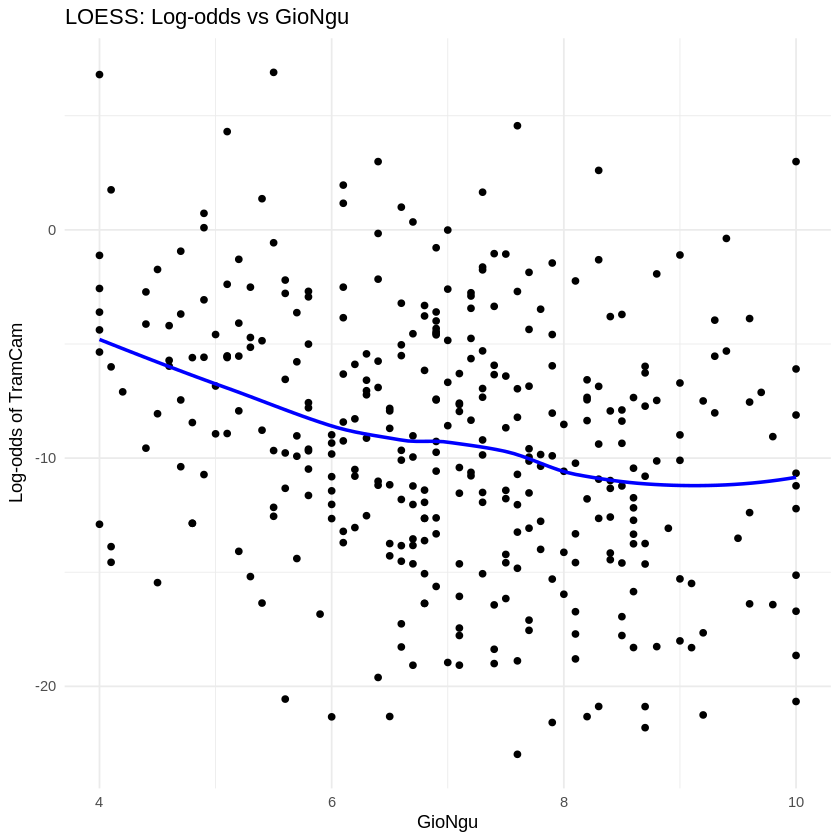

`geom_smooth()` using formula = 'y ~ x'


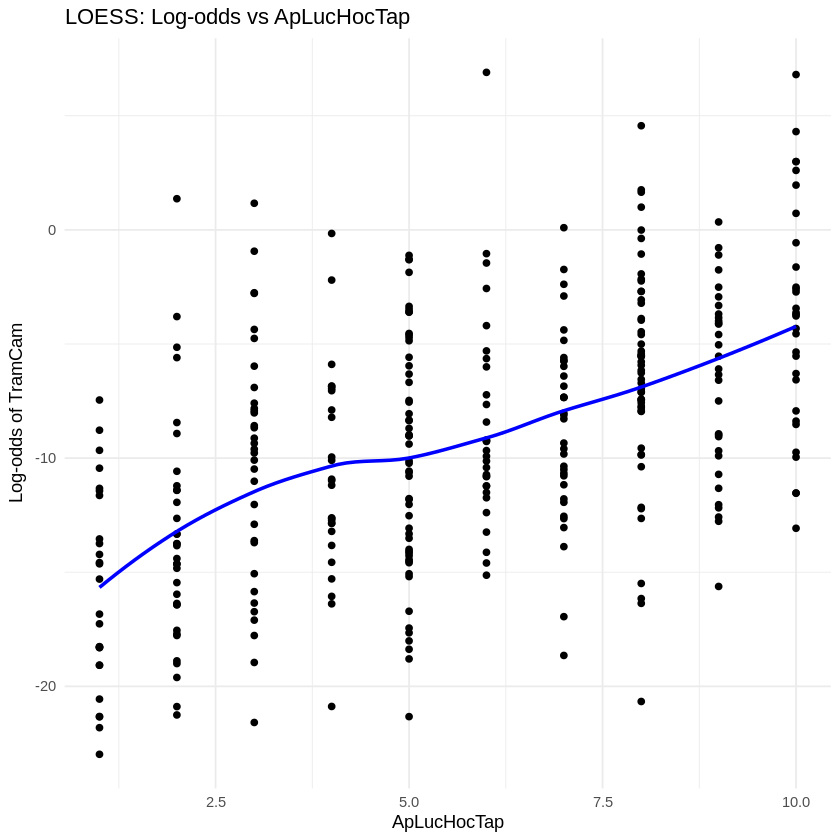

`geom_smooth()` using formula = 'y ~ x'


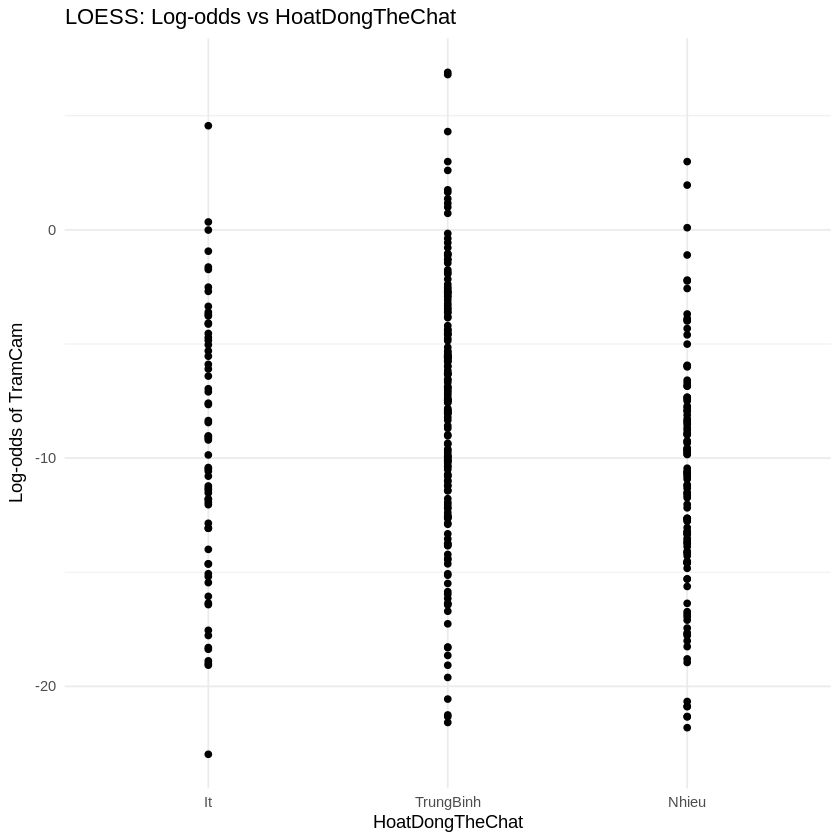

`geom_smooth()` using formula = 'y ~ x'


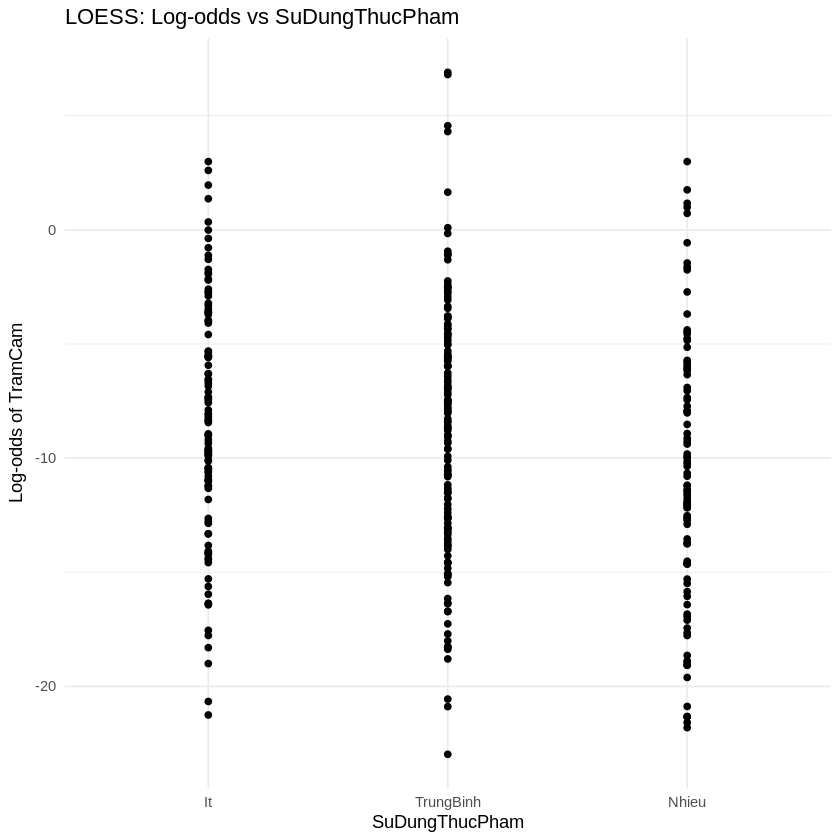

`geom_smooth()` using formula = 'y ~ x'


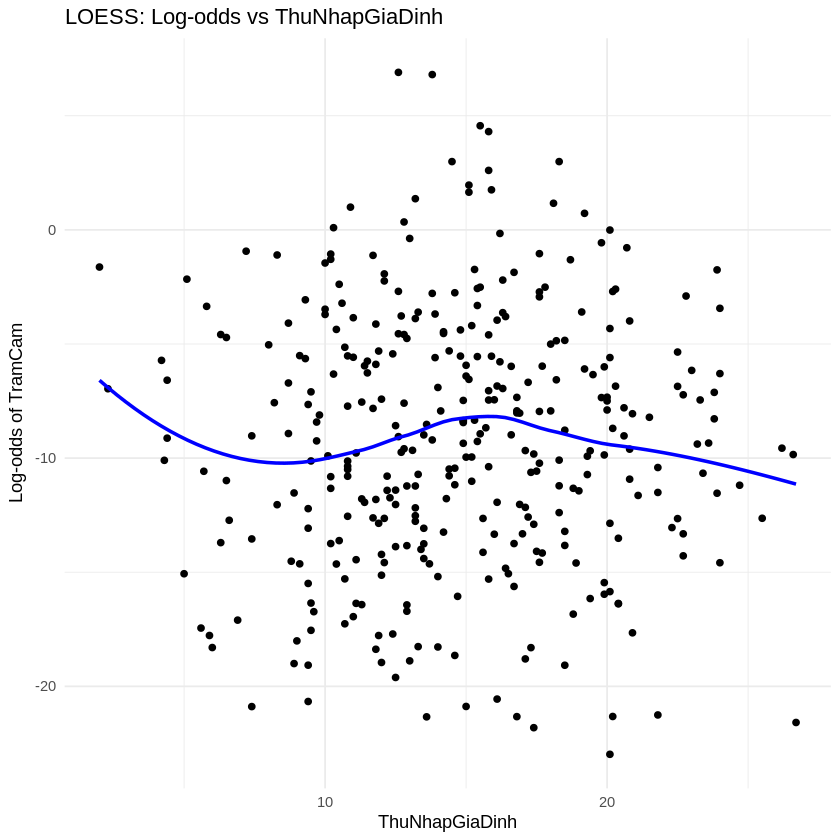

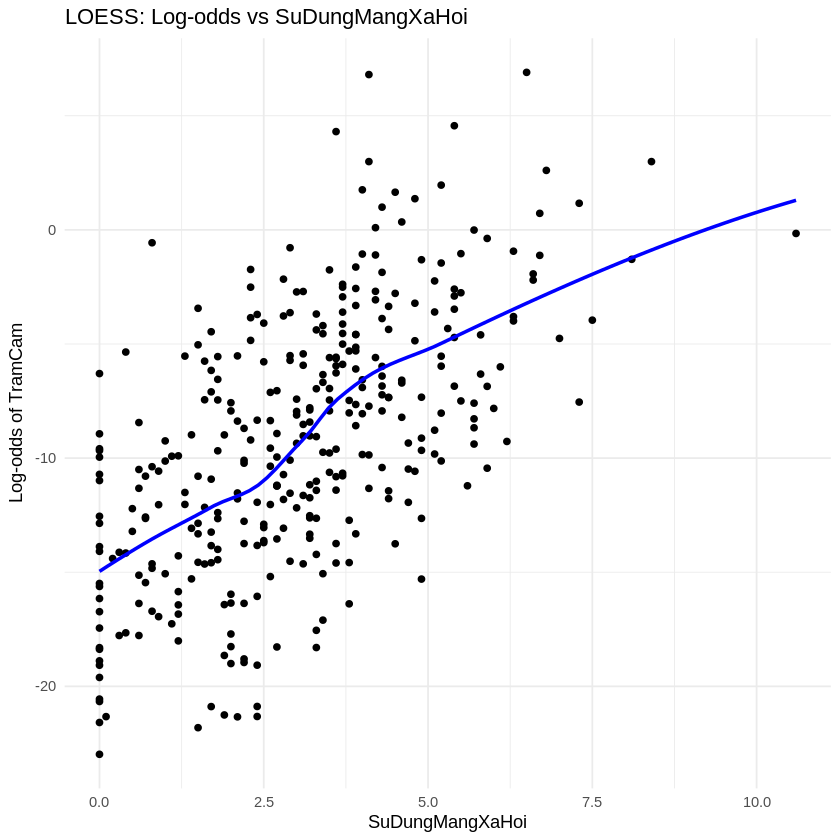

In [75]:
# HUY - NV3 - NV4
# -------------------------------
# 3. Kiểm tra xem mối quan hệ giữa các biến độc lập liên tục và log-odds của biến phụ thuộc có tuyến tính hay không
# -------------------------------
  # Dự đoán xác suất từ mô hình model_2
data$predicted_prob <- predict(model_2, type = "response")

# Tính log-odds
data$log_odds <- log(data$predicted_prob / (1 - data$predicted_prob))

#Danh sach cac bien lien tuc
continuous_vars <- c("Tuoi", "GioHoc", "GioNgu", "ApLucHocTap",
                     "HoatDongTheChat", "SuDungThucPham",
                     "ThuNhapGiaDinh", "SuDungMangXaHoi")

# Ve Loess cho tung bien
par(mfrow = c(2, 4)) # Sắp xếp các biểu đồ thành lưới 2x4
for (var in continuous_vars) {
  # Bieu do LOESS
  ggplot(data, aes_string(x = var, y = "log_odds")) +
    geom_point() +
    geom_smooth(method = "loess", se = FALSE, color = "blue") +
    labs(title = paste("LOESS: Log-odds vs", var),
         x = var,
         y = "Log-odds of TramCam") +
    theme_minimal()
  print(ggplot2::last_plot())
}

# Đặt lại bố cục mặc định
par(mfrow = c(1, 1))

#Nhận xét


Kiểm tra các điểm dữ liệu có ảnh hưởng lớn (Cook's Distance)
Các điểm dữ liệu có ảnh hưởng lớn (Cook's Distance > 4/n): 2 46 49 112 121 147 169 210 215 216 262 268 298 327 331 332 343 345 349 


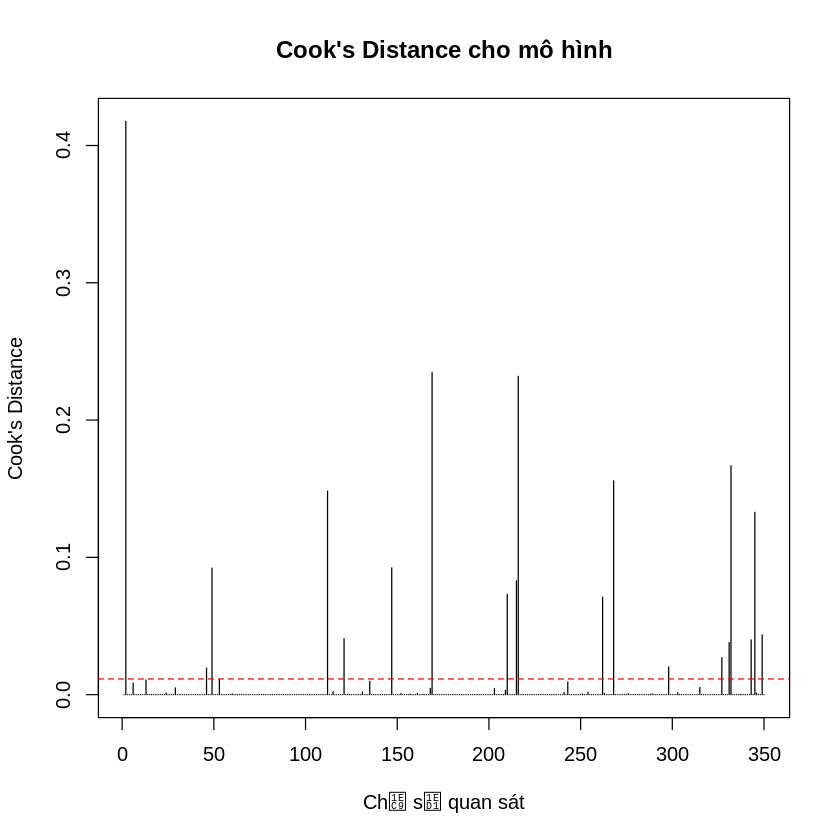

In [76]:
# HUY - NV3 - NV4
# -------------------------------
# 4. Kiểm tra các điểm dữ liệu có ảnh hưởng lớn đến mô hình
# -------------------------------
  cat("\nKiểm tra các điểm dữ liệu có ảnh hưởng lớn (Cook's Distance)\n")

# Tính Cook's Distance cho mô hình model_2
cooks_d <- cooks.distance(model_2)

# Vẽ biểu đồ Cook's Distance
plot(cooks_d, type = "h", main = "Cook's Distance cho mô hình",
     xlab = "Chỉ số quan sát", ylab = "Cook's Distance")
abline(h = 4/nrow(data), col = "red", lty = 2)  # Ngưỡng tham khảo

# Xác định các điểm có Cook's Distance lớn
influential_points <- which(cooks_d > 4/nrow(data))
cat("Các điểm dữ liệu có ảnh hưởng lớn (Cook's Distance > 4/n):", influential_points, "\n")

#Nhận xét

In [77]:
# HẢI - NV5 - NV6
# -------------------------------
# 5. Kiểm tra mức độ đa cộng tuyến giữa các biến độc lập và đưa ra phương án xử lý nếu cần
# -------------------------------
vif_values <- vif(model_2)
vif_values
#Nếu có biến VIF > 5 hoặc 10 → đề xuất xử lý (loại bỏ, kết hợp).
high_vif <- names(vif_values[vif_values > 5])
if (length(high_vif) > 0) {
  cat('Biến có VIF cao bất thường: ', high_vif, '\n')
} else {
  cat('Biến có VIF cao bất thường: 0\n')
}

# Loại bỏ biến có VIF cao nhất (nếu có)
if (length(high_vif) > 0) {
  model3 <- update(model2, paste(". ~ . -", high_vif[which.max(vif_values[high_vif])]))
  vif(model3)
}

,GVIF,Df,GVIF^(1/(2*Df))
Tuoi,1.381041,1,1.175177
GioHoc,1.945005,1,1.394634
GioNgu,1.721328,1,1.311994
MoiQuanHeXaHoi,1.890501,1,1.374955
TienSuTramCamGiaDinh,1.616461,1,1.271401
ApLucHocTap,3.026964,1,1.739817
HoatDongTheChat,2.124515,2,1.207299
SuDungThucPham,1.839569,2,1.164606
ThuNhapGiaDinh,1.215941,1,1.102697
SuDungMangXaHoi,3.824850,1,1.955722


Biến có VIF cao bất thường: 0


In [78]:
# HẢI - NV5 - NV6
# -------------------------------
# 6. Kết quả của mô hình Logistic đa biến cuối cùng (sau khi đã xử lý đa cộng tuyến và các giả định khác nếu cần).
# -------------------------------
cat("--- KẾT QUẢ MÔ HÌNH LOGISTIC ĐA BIẾN CUỐI CÙNG ---\n")
print(summary(model_2))

--- KẾT QUẢ MÔ HÌNH LOGISTIC ĐA BIẾN CUỐI CÙNG ---

Call:
glm(formula = TramCam ~ Tuoi + GioHoc + GioNgu + MoiQuanHeXaHoi + 
    TienSuTramCamGiaDinh + ApLucHocTap + HoatDongTheChat + SuDungThucPham + 
    ThuNhapGiaDinh + SuDungMangXaHoi, family = binomial, data = data)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -14.10818    5.13145  -2.749 0.005971 ** 
Tuoi                    0.39247    0.20171   1.946 0.051694 .  
GioHoc                 -0.17515    0.06079  -2.881 0.003959 ** 
GioNgu                 -0.85785    0.34525  -2.485 0.012966 *  
MoiQuanHeXaHoi         -0.59881    0.17910  -3.344 0.000827 ***
TienSuTramCamGiaDinh1   2.91138    1.10751   2.629 0.008570 ** 
ApLucHocTap             0.99040    0.28839   3.434 0.000594 ***
HoatDongTheChat.L      -1.22453    1.09349  -1.120 0.262782    
HoatDongTheChat.Q      -1.68547    0.86725  -1.943 0.051961 .  
SuDungThucPham.L       -0.87611    0.84361  -1.039 0.299025    
SuDungThu